In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!cp "/content/gdrive/My Drive/ColabNotebooks/RxTorax.zip" "RxTorax.zip"

In [0]:
!unzip RxTorax.zip

In [0]:
#Agora que ja temos as imagens baixadas, para abrir as imagens .jpg, vamos utilizar o glob, que lista os arquivos que existem dentro de uma pasta

from glob import glob

print ('\033[1m' + 'Etapa Concluída. Vá para o próximo comando!')
  
#Para executar este código, pressione SHIFT + ENTER

Etapa Concluída. Vá para o próximo comando!


In [0]:
#Vamos definir o caminho das pastas que contém as imagens
derrame_dir = 'dataset/effusion/*.png'
normal_dir = 'dataset/normal/*.png'

#Agora vamos listar os arquvos dentro de cada uma das pastas, usando o glob()
derrame_lista = glob(derrame_dir)
normal_lista = glob(normal_dir)

#Para termos ideia do número de arquivos em cada pasta, vamos dar um print do tamanho da lista (len(lista)))
print('Número de casos com derrame: ', len(derrame_lista))
print('Número de casos normais: ', len(normal_lista))

print ('\n' + '\033[1m' + 'Etapa Concluída. Vá para o próximo comando!')

#Execute esse código com SHIFT + ENTER


Número de casos com derrame:  500
Número de casos normais:  500

Etapa Concluída. Vá para o próximo comando!


In [0]:
# Para ter ideia de como é a lista de arquivos gerada pelo glob, vamos olhar a variável derrame_lista que criamos acima,
# Estaremos listando todos os casos com derrame
derrame_lista
print(*derrame_lista)

print ('\n' + '\033[1m' + 'Etapa Concluída. Vá para o próximo comando!')

#Execute esse código com SHIFT + ENTER

dataset/effusion/effusion156.png dataset/effusion/effusion395.png dataset/effusion/effusion130.png dataset/effusion/effusion65.png dataset/effusion/effusion378.png dataset/effusion/effusion62.png dataset/effusion/effusion324.png dataset/effusion/effusion326.png dataset/effusion/effusion319.png dataset/effusion/effusion56.png dataset/effusion/effusion292.png dataset/effusion/effusion477.png dataset/effusion/effusion174.png dataset/effusion/effusion434.png dataset/effusion/effusion393.png dataset/effusion/effusion24.png dataset/effusion/effusion249.png dataset/effusion/effusion100.png dataset/effusion/effusion181.png dataset/effusion/effusion203.png dataset/effusion/effusion5.png dataset/effusion/effusion356.png dataset/effusion/effusion89.png dataset/effusion/effusion258.png dataset/effusion/effusion455.png dataset/effusion/effusion88.png dataset/effusion/effusion289.png dataset/effusion/effusion172.png dataset/effusion/effusion38.png dataset/effusion/effusion484.png dataset/effusion/ef

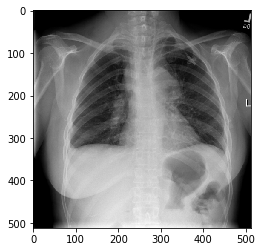


Etapa Concluída. Vá para o próximo comando!


In [0]:
#Para abrir o arquivo de imagem, utilizaremos o openCV, uma biblioteca aberta de visão computacional
#Utilizaremos uma biblioteca de plotagem de gráficos chamada a matplotlib
#!pip install opencv-python
import cv2
from matplotlib import pyplot as plt

#Escolha um numero entre 0 e 500:

ID_arquivo = 100

imagem = cv2.imread(derrame_lista[ID_arquivo])

plt.imshow(imagem) #Plota a imagem
plt.show() #Plota a imagem

print ('\n' + '\033[1m' + 'Etapa Concluída. Vá para o próximo comando!')


#Execute esse código com SHIFT + ENTER

#Pode modificar ID_arquivo com outros números para vizualizar outras imagens. Pode repetir quantas vezes quiser

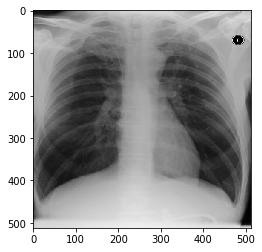


Etapa Concluída. Vá para o próximo comando!


In [0]:
ID_arquivo = 301

imagem = cv2.imread(normal_lista[ID_arquivo])

plt.imshow(imagem)
plt.show()

print ('\n' + '\033[1m' + 'Etapa Concluída. Vá para o próximo comando!')


#Execute esse código com SHIFT + ENTER

In [0]:
#Para usar matrizes, importaremos a NumPy.

# Por que usamos matrizes? A entrada de informações nas redes neurais se dá nesse formato,
# pois permite processamento computacional paralelo e maior velocidade de processamento.

import numpy as np

dataset = [] # cria uma lista vazia para incluir as imagens do dataset
labels = [] # cria uma lista vazia para incluir a categoria a qual cada imagem pertence (0 ou 1)

for arquivo in derrame_lista: # para cada arquivo de imagem na lista derrame:
    img = cv2.imread(arquivo, cv2.IMREAD_GRAYSCALE) #abre o arquivo como escala de cinzas e coloca a imagem na variável img
    img = cv2.resize(img, (256,256)) #redimensiona a imagem para 256 x 256 e salva na mesma variável img
    dataset.append(img) #adiciona essa imagem na lista do dataset e 
    labels.append(1) #informa que ela é um caso de derrrame (1)

#Agora faremos o mesmo para as imagens sem derrame

for arquivo in normal_lista:
    img = cv2.imread(arquivo, cv2.IMREAD_GRAYSCALE) 
    img = cv2.resize(img, (256,256)) 
    dataset.append(img)
    labels.append(0) #mas agora informaremos que ela é um caso normal (0)
    
dataset = np.asarray(dataset, dtype=np.float32) #transforma a lista de variáveis numa matriz
labels = np.asarray(labels)

for i in range(len(dataset)):
  dataset[i] = (dataset[i] - np.average(dataset[i], axis= (0, 1))) / np.std(dataset[i], axis= (0, 1))

print(dataset.shape)

print ('\n' + '\033[1m' + 'Etapa Concluída. Vá para o próximo comando!')


#Vamos ver qual o tamanho dessa matriz 'dataset'
#Esperamos que a primeira dimensão dela seja de 700 (350 casos de derrame e 350 normais)
#A segunda e a terceira dimensões devem ser 256.

# a saída esperada é (1000, 256, 256)

(1000, 256, 256)

Etapa Concluída. Vá para o próximo comando!


In [0]:
#Vamos separar nosso dataset em grupos de treinamento, validação e test. Para isso, usaremos a biblioteca sklearn.

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

#Divide treino, validação e teste na proporção 80%/10%/10%

dataset_train, dataset_test, labels_train, labels_test = train_test_split(dataset[:,...,np.newaxis], labels[:,...,np.newaxis], test_size=0.1, random_state=88)
dataset_train, dataset_val, labels_train, labels_val = train_test_split(dataset_train, labels_train, test_size=0.111, random_state=88)

#Mostra o tamanho das variáveis dos grupos

print('(Número de imagens, Imagem_X, Imagem_Y, canais de cor) (Número de labels, 1)')
print(dataset_train.shape, labels_train.shape)
print(dataset_val.shape, labels_val.shape)
print(dataset_test.shape, labels_test.shape)

#Você deve ver a seguinte saída:

#(800, 256, 256, 1) (800,1)
#(100, 256, 256, 1) (100,1)
#(100, 256, 256, 1) (100,1)

print ('\n' + '\033[1m' + 'Etapa Concluída. Vá para o próximo comando!')

(Número de imagens, Imagem_X, Imagem_Y, canais de cor) (Número de labels, 1)
(800, 256, 256, 1) (800, 1)
(100, 256, 256, 1) (100, 1)
(100, 256, 256, 1) (100, 1)

Etapa Concluída. Vá para o próximo comando!


In [0]:
#Para criar a rede neural convolucional, utilizaremos o Keras, que é uma biblioteca para Deep Learning em Python
#Inicialmente vamos importar as funções do Keras que iremos utilizar:

from keras.models import Sequential
from keras import optimizers
from keras.layers.core import Dense, Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D, GlobalAveragePooling2D
from keras.models import Model
from keras.layers import Input, Concatenate, add
from keras.callbacks import ModelCheckpoint
from keras.layers import Activation, Dense, LeakyReLU
from keras.utils.np_utils import to_categorical

#Agora criaremos a estrutura da rede neural convolucional

#A primeira define o tamanho da camada de entrada da rede
#Lembre que a nossa matriz com todas as imagens de cada categoria tem o formato (556, 256, 256)
#Nesse caso a entrada (input) da rede é cada imagem individualmente
#Ou seja, uma imagem de tamanho 256 x 256 pixels e 1 canal de cor (escala de cinzas)

imgs = Input(shape=(256,256,1))


#Abaixo vamos adicionar a primeira camada convolucional

x = Conv2D(8, 3, padding='same', activation='relu')(imgs)

#Em seguida, adicionamos uma camada MaxPool, que irá reduzir em 75% o tamanho da saída da camada convolucional.
#Fazemos isso para evitar que o número de parâmetros da rede aumente demais.
#Não se preocupe em entender o detalhe de cada uma dessas operações. Tente captar a ideia geral.

x = MaxPool2D()(x)

#Adicionaremos mais camadas convolucionais, seguidas de MaxPool

x = Conv2D(8, 3, padding='same', activation='relu')(x)
x = Conv2D(8, 3, padding='same', activation='relu')(x)
x = Conv2D(8, 3, padding='same', activation='relu')(x)
x = Conv2D(8, 3, padding='same', activation='relu')(x)
x = MaxPool2D()(x)
x = Conv2D(8, 3, padding='same', activation='relu')(x)
x = MaxPool2D()(x)
x = Conv2D(8, 3, padding='same', activation='relu')(x)
x = MaxPool2D()(x)
x = Conv2D(8, 3, padding='same', activation='relu')(x)
x = MaxPool2D()(x)
x = Conv2D(8, 3, padding='same', activation='relu')(x)
x = MaxPool2D()(x)
x = Conv2D(10, 3, padding='same', activation='relu')(x)
x = MaxPool2D()(x)
x = Conv2D(10, 3, padding='same', activation='relu')(x)
x = MaxPool2D()(x)
x = Conv2D(12, 3, padding='same', activation='relu')(x)
x = Conv2D(12, 3, padding='same', activation='relu')(x)
x = Conv2D(12, 3, padding='same', activation='relu')(x)
x = GlobalAveragePooling2D()(x)

#Finalmente adicionaremos duas camadas densas, ou 'Fully Connected Layers'.
#Essas camadas são redes neurais convencionais, sem convolução.
#Não se preocupe com o porquê de usarmos essa camada agora.
x = Dense(64, activation='relu')(x)

#Dropout é uma maneira de reduzir overfitting.
x = Dropout(0.6)(x)

#Definiremos agora a entrada e a saída da rede
#A função Dense tem o argumento "1" pois a saída da rede é a classificação hematoma x não-hematoma
#Ou seja, a saída da rede é apenas um número (0 ou 1)

x = Dense(32, activation='relu')(x)

outputs = Dense(1, activation='sigmoid')(x)

inputs = imgs

#Por fim, definimos a rede

RadEinstein_CNN = Model(inputs=inputs, outputs=outputs)

#Agora, definiremos o método de otimização da rede: ADAM, com a taxa de aprendizado e de decaimento
#Cada um desses parâmetros é ajustável.

custom_adam = optimizers.Adam(lr=0.0005, decay=0.0004)

#Compila o modelo
RadEinstein_CNN.compile(loss='binary_crossentropy', optimizer=custom_adam, metrics=['acc'])

print ('\033[1m' + 'Etapa Concluída. Vá para o próximo comando!')

W0730 03:34:18.983312 140480931297152 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Etapa Concluída. Vá para o próximo comando!


In [0]:
#Vamos importar as função do Keras que faz data augmentation:

from keras.preprocessing.image import ImageDataGenerator

#Aqui podemos definir diferentes variáveis que vão definir como as imagens  
#vão mudar em rotação, "corte" ou zoom.

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

Treinando a Rede RadEinstein_CNN:
Epoch 1/50
40/40 [==============================] - 10s 260ms/step - loss: 0.6934 - acc: 0.5038 - val_loss: 0.6930 - val_acc: 0.5100

Epoch 00001: val_loss improved from inf to 0.69304, saving model to Melhor_modelo.hdf5
Epoch 2/50
40/40 [==============================] - 3s 72ms/step - loss: 0.6932 - acc: 0.5063 - val_loss: 0.6930 - val_acc: 0.5100

Epoch 00002: val_loss improved from 0.69304 to 0.69303, saving model to Melhor_modelo.hdf5
Epoch 3/50
40/40 [==============================] - 3s 85ms/step - loss: 0.6930 - acc: 0.5138 - val_loss: 0.6931 - val_acc: 0.5100

Epoch 00003: val_loss did not improve from 0.69303
Epoch 4/50
40/40 [==============================] - 3s 86ms/step - loss: 0.6932 - acc: 0.4938 - val_loss: 0.6930 - val_acc: 0.5100

Epoch 00004: val_loss improved from 0.69303 to 0.69302, saving model to Melhor_modelo.hdf5
Epoch 5/50
40/40 [==============================] - 3s 84ms/step - loss: 0.6931 - acc: 0.5063 - val_loss: 0.6930 - v

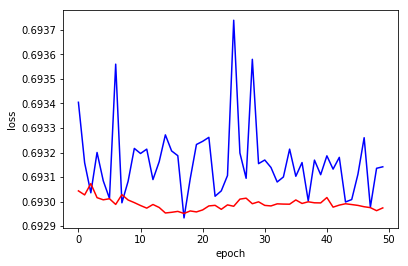

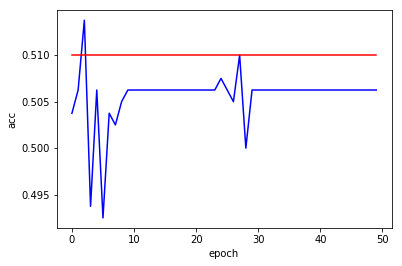

Treino finalizado.

Agora vamos avaliar o modelo no dataset de teste. Vá para a próximo comando.


In [0]:
#Primeiro vamos definir para salvar o melhor modelo que for encontrado durante o treino

checkpointer = ModelCheckpoint(filepath='Melhor_modelo.hdf5', monitor='val_loss',
                               verbose=1, save_best_only=True)


print('Treinando a Rede RadEinstein_CNN:')
  

#Definimos o treinamento com o dataset de treino, realizando validação no dataset de validação.
#O treinamento não usa o dataset de teste, ficará guardado para avaliarmos nossa rede depois.

Valida = (dataset_val, labels_val)

#Muito bem, chegou a hora mais esperada, vamos treinar a nossa rede com o dataset que criamos

hist = RadEinstein_CNN.fit_generator(datagen.flow(dataset_train, labels_train, batch_size=20), steps_per_epoch=1*len(dataset_train) / 20, epochs=50, 
                    validation_data= (dataset_val, labels_val), 
                    callbacks=[checkpointer])

#Por fim, plotamos os resultados de evolução da medida de erro (loss) ao longo dos epochs

plt.plot(hist.history['loss'], 'b-', label='train loss')
plt.plot(hist.history['val_loss'], 'r-', label='val loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


plt.plot(hist.history['acc'], 'b-', label='train accuracy')
plt.plot(hist.history['val_acc'], 'r-', label='val accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.show()

del(RadEinstein_CNN)
print('Treino finalizado.')

print ('\n' + '\033[1m' + 'Agora vamos avaliar o modelo no dataset de teste. Vá para a próximo comando.')

#Execute esse código com SHIFT + ENTER

In [0]:
#Vamos importar a biblioteca do keras que abre modelos salvos previamente
from keras.models import load_model

#Agora abrimos o melhor modelo que geramos anteriormente

melhor_modelo = load_model('Melhor_modelo.hdf5')

print ('\033[1m' + 'Etapa Concluída. Vá para o próximo comando!')

#Execute esse código com SHIFT + ENTER

W0730 01:26:09.616761 139855884334976 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


Etapa Concluída. Vá para o próximo comando!


In [0]:
#Usamos a função evaluate para avaliar a acurácia do nosso modelo no grupo de teste
print('Acurácia no grupo de teste: ', melhor_modelo.evaluate(dataset_test, labels_test, verbose=0)[1])

print ('\n' + '\033[1m' + 'Etapa Concluída. Vá para o próximo comando!')

#Execute esse código com SHIFT + ENTER

Acurácia no grupo de teste:  0.44

Etapa Concluída. Vá para o próximo comando!


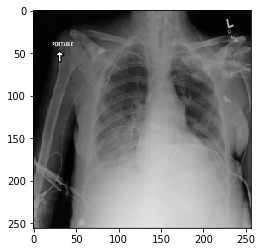

Classe: derrame
Predição: derrame
Tempo médio de predição:
1000 loops, best of 3: 1.79 ms per loop

Etapa Concluída. Repita a operação procurando Quando satisfeito vá para o próximo comando!


In [0]:
#Agora vemos fazer a inferência em imagens individuais do nosso dataset de teste.

#Defina uma imagem no grupo de Teste, de 0 a 69:

ID_imagem = 20

#Agora vamos criar uma figura com a imagem escolhemos

plt.imshow(np.squeeze(dataset_test[ID_imagem]), cmap='gray')
plt.show()

#Vamos mostrar a qual classe ela pertence

print('Classe:', 'normal' if labels_test[ID_imagem]==0 else 'derrame')

predicao = np.round(melhor_modelo.predict(dataset_test[ID_imagem][np.newaxis,:,...], verbose=0))==0

print('Predição:', 'normal' if predicao else 'derrame')

#Calcula o tempo médio de predição
print('Tempo médio de predição:')
%timeit melhor_modelo.predict(dataset_test[ID_imagem][np.newaxis,:,...], verbose=0)

print ('\n' + '\033[1m' + 'Etapa Concluída. Repita a operação procurando Quando satisfeito vá para o próximo comando!')

#Execute esse código com SHIFT + ENTER